In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [68]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [69]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder3'

In [70]:
df = pd.read_csv("../Folder2/CDC_excessdeaths_cleaned.csv", index_col=0)
df.head()

,Date,Year,Week,State,Total_Deaths,Excess_Deaths,Covid_19_Deaths,Cum_Excess_Deaths,Cum_Covid_19_Deaths
0,2019-12-29T00:00:00.000,2019,52,United States,60171.0,-1203.42,1.0,-1203.42,1.0
1,2020-01-05T00:00:00.000,2020,1,United States,60725.0,-1821.75,0.0,-3025.17,1.0
2,2020-01-12T00:00:00.000,2020,2,United States,59352.0,-1780.56,2.0,-4805.73,3.0
3,2020-01-19T00:00:00.000,2020,3,United States,59153.0,-591.53,2.0,-5397.26,5.0
4,2020-01-26T00:00:00.000,2020,4,United States,58822.0,-588.22,0.0,-5985.48,5.0


In [71]:
cum_excess = df.loc[df["State"] == "United States"][["Cum_Excess_Deaths"]]
time = np.arange(len(cum_excess))
cum_excess
cum_covid19 = df.loc[df["State"] == "United States"][["Cum_Covid_19_Deaths"]]

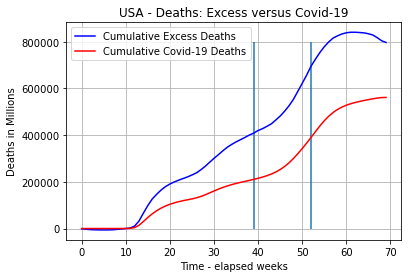

In [97]:
fig1 = plt.subplots(1,1)
plt.plot(time,cum_excess, color="blue", label="Cumulative Excess Deaths")
plt.plot(time,cum_covid19, color="red", label="Cumulative Covid-19 Deaths")
plt.title("USA - Deaths: Excess versus Covid-19")
plt.xlabel("Time - elapsed weeks")
plt.ylabel("Deaths in Millions")
plt.legend(loc="best")
plt.vlines(39,0,800000)
plt.vlines(52,0,800000)
plt.grid()
plt.plot()
plt.savefig("../Folder4/Excess_Deaths_USA.png")

In [73]:
df.head()

,Date,Year,Week,State,Total_Deaths,Excess_Deaths,Covid_19_Deaths,Cum_Excess_Deaths,Cum_Covid_19_Deaths
0,2019-12-29T00:00:00.000,2019,52,United States,60171.0,-1203.42,1.0,-1203.42,1.0
1,2020-01-05T00:00:00.000,2020,1,United States,60725.0,-1821.75,0.0,-3025.17,1.0
2,2020-01-12T00:00:00.000,2020,2,United States,59352.0,-1780.56,2.0,-4805.73,3.0
3,2020-01-19T00:00:00.000,2020,3,United States,59153.0,-591.53,2.0,-5397.26,5.0
4,2020-01-26T00:00:00.000,2020,4,United States,58822.0,-588.22,0.0,-5985.48,5.0


In [74]:
# Excess - Covid / Excess
df["Excess_Covid_Delta"] = ""
for index, row in df.iterrows():
    if row[7] == 0:
        df.loc[index,"Excess_Covid_Delta"] = 0
    else:
        df.loc[index,"Excess_Covid_Delta"] = 100*(row[7]-row[8])/row[7] 

In [75]:
df.head(52)

,Date,Year,Week,State,Total_Deaths,Excess_Deaths,Covid_19_Deaths,Cum_Excess_Deaths,Cum_Covid_19_Deaths,Excess_Covid_Delta
0,2019-12-29T00:00:00.000,2019,52,United States,60171.0,-1203.42,1.0,-1203.42,1.0,100.083
1,2020-01-05T00:00:00.000,2020,1,United States,60725.0,-1821.75,0.0,-3025.17,1.0,100.033
2,2020-01-12T00:00:00.000,2020,2,United States,59352.0,-1780.56,2.0,-4805.73,3.0,100.062
3,2020-01-19T00:00:00.000,2020,3,United States,59153.0,-591.53,2.0,-5397.26,5.0,100.093
4,2020-01-26T00:00:00.000,2020,4,United States,58822.0,-588.22,0.0,-5985.48,5.0,100.084
5,2020-02-02T00:00:00.000,2020,5,United States,59466.0,0.00,2.0,-5985.48,7.0,100.117
6,2020-02-09T00:00:00.000,2020,6,United States,58799.0,0.00,0.0,-5985.48,7.0,100.117
7,2020-02-16T00:00:00.000,2020,7,United States,58893.0,588.93,5.0,-5396.55,12.0,100.222
8,2020-02-23T00:00:00.000,2020,8,United States,59316.0,1779.48,9.0,-3617.07,21.0,100.581
9,2020-03-01T00:00:00.000,2020,9,United States,59685.0,1790.55,37.0,-1826.52,58.0,103.175


In [76]:
df.loc[lambda x: (x.State == "United States") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()

46.6254135355602

In [77]:
df.loc[lambda x: (x.State == "Minnesota") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()

46.06611843238459

In [78]:
df.loc[lambda x: (x.State == "Utah") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()

72.36231101774261

In [79]:
states = df["State"].unique()

In [80]:
Dict = {"States":[],"mean_discrepancy":[]}
for state in states:
    Dict["States"].append(us_state_abbrev[state])
    mean_discrepancy = df.loc[lambda x: (x.State == state) & (x.Week > 39) & (x.Week < 52)]["Excess_Covid_Delta"].mean()
    Dict["mean_discrepancy"].append(mean_discrepancy)

In [82]:
df_discrepancy = pd.DataFrame(Dict)
df_discrepancy.head(60)
df_discrepancy.sort_values(by="mean_discrepancy")

,States,mean_discrepancy
41,RI,26.329753
40,PA,29.252482
16,IA,36.421360
28,NE,40.008598
22,MA,42.384000
24,MN,42.881366
37,OH,43.631629
15,IN,44.579270
7,CT,45.277353
49,WA,46.093279


In [65]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
df_deathrate.head(20)

,States,Covid_Death_Rate
0,NaN,4.000000
1,NaN,2021.000000
2,State,NaN
3,RMI,0.000000
4,FSM,0.000000
5,AK,0.521335
6,UT,0.554209
7,VI,0.864000
8,NE,1.020306
9,VT,1.071802


In [83]:
df_merge = df_deathrate.merge(df_discrepancy, how='inner', on="States")

In [84]:
df_merge.head()

,States,Covid_Death_Rate,mean_discrepancy
0,AK,0.521335,90.854989
1,UT,0.554209,66.864274
2,NE,1.020306,40.008598
3,VT,1.071802,81.053293
4,ID,1.090293,58.562489


In [85]:
df10 = pd.read_csv("../Folder4/Output/Adj_for_age_Death_Rate.csv")
df10.drop(columns=["Unnamed: 0"], inplace=True)
df_merge.rename({"States":"State"},inplace=True)
df10.head()
df_merge.rename(columns={"States":"State"},inplace=True)
df11 = df_merge.merge(df10,on="State")
df11.head()

,State,Covid_Death_Rate,mean_discrepancy,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,0.521335,90.854989,0.043606,0.063322,1.452128,0.521335,0.757045
1,UT,0.554209,66.864274,0.073363,0.106704,1.454459,0.554209,0.806074
2,NE,1.020306,40.008598,0.145057,0.143926,0.992200,1.020306,1.012348
3,VT,1.071802,81.053293,0.034616,0.029556,0.853828,1.071802,0.915134
4,ID,1.090293,58.562489,0.113035,0.122320,1.082147,1.090293,1.179857


The r-squared is 0.11
The line equation is: y = -0.01x + 2.22


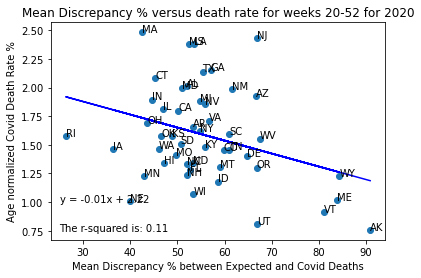

In [86]:
y = df11["Adj_for_age_Covid_Death_Rate"]
x = df11["mean_discrepancy"]


plt.scatter(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"b-")
r_sqr = round(rvalue**2,2)
plt.annotate(line_eq,(25,1),fontsize=10,color="black")
plt.annotate(f"The r-squared is: {r_sqr}",(25,0.75),fontsize=10,color="black")
plt.xlabel('Mean Discrepancy % between Expected and Covid Deaths')
plt.ylabel('Age normalized Covid Death Rate %')
plt.title("Mean Discrepancy % versus death rate for weeks 20-52 for 2020")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")
for index, row in df11.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[7]))
plt.savefig("../Folder4/Excess_Deaths_Scatter.png")
plt.show()

In [87]:
Dict = {"State":[],"Excess_adj_rate":[]}
for index, rows in df11.iterrows():
        Dict["State"].append(df11.loc[index,"State"])
        adj_rate = 46*df11.loc[index,"Adj_for_age_Covid_Death_Rate"]/(100-df11.loc[index,"mean_discrepancy"])
        Dict["Excess_adj_rate"].append(adj_rate)      

In [99]:
new_df = pd.DataFrame(Dict)
new_df = new_df.merge(df11[["State","Adj_for_age_Covid_Death_Rate"]],on="State")
new_df.sort_values(by="Excess_adj_rate", ascending=True).head(5)

,State,Excess_adj_rate,Adj_for_age_Covid_Death_Rate
2,NE,0.776245,1.012348
34,RI,0.984521,1.576738
8,MN,0.988776,1.227772
5,WI,1.057802,1.072256
25,IA,1.060492,1.465753


In [103]:
new_df.sort_values(by="Excess_adj_rate", ascending=False, inplace = True)

In [104]:
state = new_df["State"]
excess_rate = new_df["Excess_adj_rate"]
adj_for_age_rate = new_df["Adj_for_age_Covid_Death_Rate"]

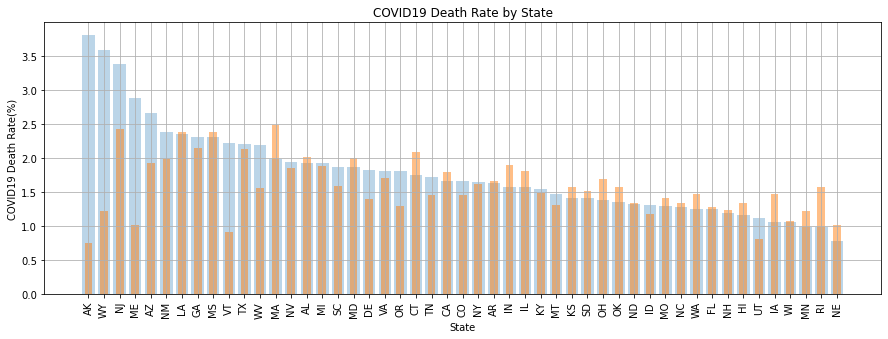

In [123]:
plt.figure(figsize=(15,5))
plt.bar(state,excess_rate,alpha=0.3)
plt.bar(state,adj_for_age_rate, alpha=0.5,width=0.5)
plt.grid(True)
plt.title("COVID19 Death Rate by State")
plt.ylabel("COVID19 Death Rate(%)")
plt.xlabel("State")
# plt.legend()
plt.xticks(rotation = 90)
# plt.savefig(“Output/death-rate-by-state.png”)
plt.savefig("../Folder4/Output/Death_Rate_ExcessDeathsCorrected.png")
plt.show()

In [108]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder3'

<Figure size 432x288 with 0 Axes>